# 👊 CHAPTER 3 Classification

#### 🙋 Chapter Manager : 장승준

## 👊 MNIST    
           
    𝐎 MNIST 이미지 분류기   
   - 28X28 픽셀 단위로 각 픽셀당 0~255 사이에 값이 저장 되어있고 수 많은 미국 고등학생 등의 사람들이 적은 숫자들 사진을 7000개를 보유하고 있음
   - 이 사진들을 이용하여 분류기를 훈련시키고 임의의 숫자 손글씨 사진을 넣어서 숫자를 (T,F => 이진분류기)맞추거나 주변이 더러운 숫자를 주변이 깨끗한 숫자로 만드는 등 분류 기초단계 연습에 좋은 data
   - 이진 분류시 교재에선 SGD(확률적 기울기 하강)을 선택했고 대량의 데이터일 경우 효과적이라고 소개, SGD : 한 번에 한 개씩 독립적으로 훈련을 하므로 온라인학습에 알맞음, 데이터가 overfitting 되는 것을 방지하기 위해 교차검증(cross-validation)을 사용하였고 fold값을 3으로 했고 평균이 95%이상인 분류기를 완성 가능.

In [1]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sn.set()

### 한글 깨짐 설정
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows'):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else:
    print('error')

In [2]:
from tensorflow.keras.datasets import mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

X = np.vstack((train_x, test_x))
X = X.reshape([-1, 28*28])

y = np.append(train_y, test_y)

print('X.shape :', X.shape)
print('y.shape :', y.shape)

X.shape : (70000, 784)
y.shape : (70000,)


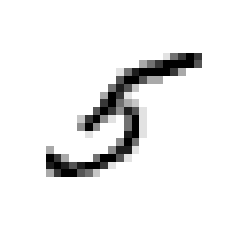

In [3]:
some_digit = X[35]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)
print('y_train.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

X_train.shape : (60000, 784)
X_test.shape : (10000, 784)
y_train.shape : (60000,)
y_test.shape : (10000,)


In [5]:
y_train_5 = (y_train == 5)  # 5는 True, 다른 숫자는 False
y_test_5 = (y_test == 5)

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 10, random_state = 42)
sgd_clf.fit(X_train, y_train_5)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

C:\Users\jjun1\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jjun1\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jjun1\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jjun1\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([False, False, False, ..., False, False, False])

In [7]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

C:\Users\jjun1\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jjun1\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jjun1\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [8]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [9]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sn.set()

### 한글 깨짐 설정
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows'):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else:
    print('error')

## 👊 분류기 성능 평가
####      - 오차 행렬

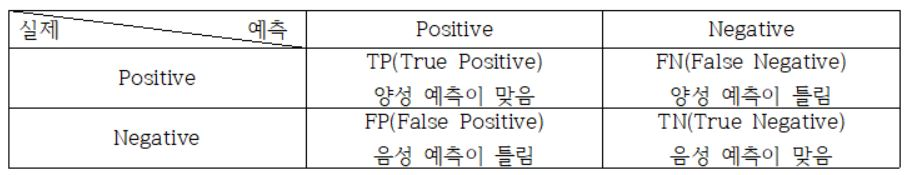

In [10]:
from IPython.display import Image
Image(filename = 'Ch3. ConfusionMatrix.JPG', width = 600, height = 600)

$$ㆍ정확도(Accuracy)  =  \frac{ TP + TN }{ TP + TN + FP + FN }$$ 

$$ㆍ정밀도(Precision) =  \frac{ TP }{ TP + FP} $$

$$ㆍ재현율(Recall) = \frac{ TP }{ TP + FN} $$

### ※ precision과 recall의 관계

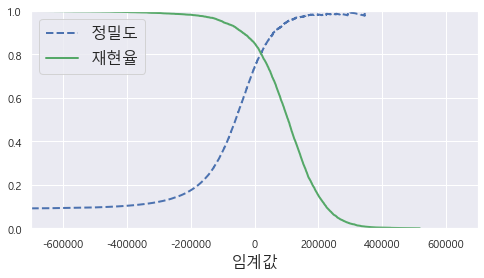

In [11]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율", linewidth=2)
    plt.xlabel("임계값", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

### ※ 정밀도와 재현율은 한 가지 답으로 올인하면 100%가 나오기 떄문에 이를 통한 혼란을 방지하고자  

$$ ㆍF1 Score = \frac{2 \times Recall \times Precision}{Racall + Precision} $$

#### => 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 갖음
#### == 불균형한 데이터셋을 다룰 때 성능 측정 지표가 되지 않는다.

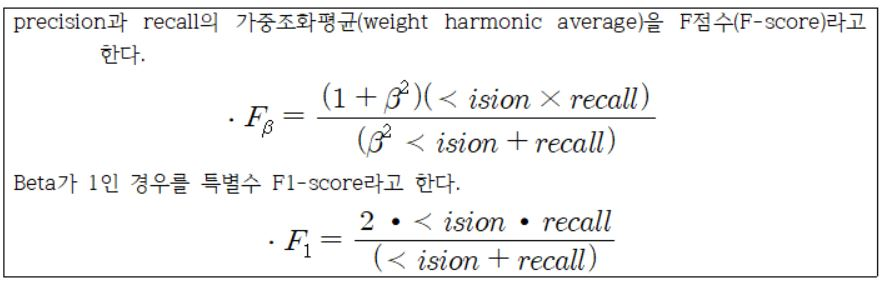

In [12]:
Image(filename = 'Ch3 F1 Score.jpg', width = 500, height = 500)

## 👊 결정임계값과 정밀도/재현율 트레이드 오프

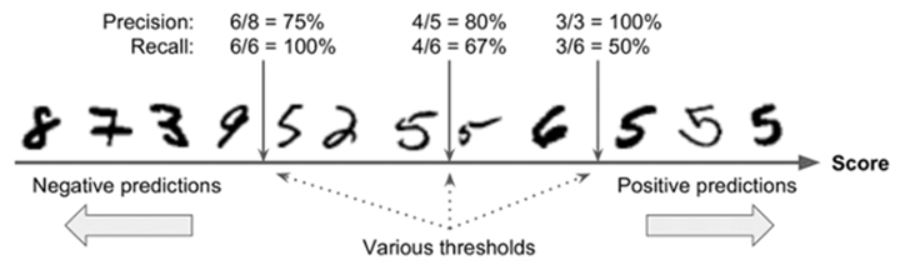

In [13]:
Image(filename = 'Ch3 정밀도_재현율 트레이드 오프.jpg', width = 500, height = 500)

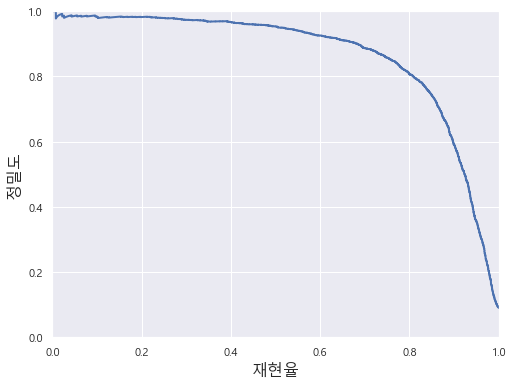

In [14]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("재현율", fontsize=16)
    plt.ylabel("정밀도", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

## 👊 ROC Curve 
- 거짓 양성 비율(False Positive Rate)에 대한 진짜 양성 비율(True Positive Rate, 민감도, 재현율)의 곡선

- FPR : 양성으로 잘못 분류된 음성 샘플의 비율 = 1 – 음성으로 정확하게 분류한 음성 샘플의 비율
- TNR : 특이도, 
- ROC Curve : 민감도(재현율)에 대한 1 – 특이도 그래프

$$ ㆍFPR = \frac{FP}{FP + TN} = \frac{FP + TN - TN}{FP + TN} = 1 - \frac{TN}{FP + TN} = 1 - TNR $$

- AUC(Area Under the Curve, 곡선 아래의 면적)을 측정하면 분류기들을 비교


In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

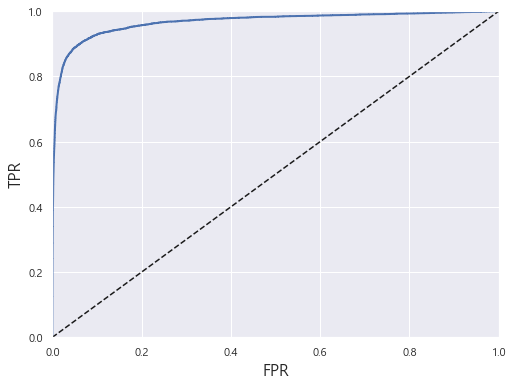

In [16]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16)
    plt.ylabel('TPR', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

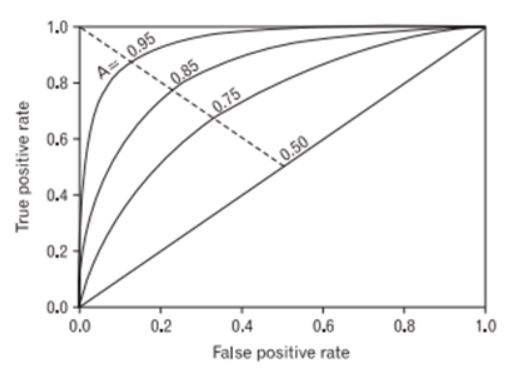

In [17]:
Image(filename = 'Ch3 ROC Curve.jpg', width = 500, height = 500)

- y = x 선과 평행하면서 ROC Curve와 접하는 부분이 y = x와 가장 멀리 있는 점이므로  그 점을 임계값으로 설정한다. ( 기울기가 1이면서 ROC Curve와 접하는 점 == 임계값) 

# 👊 Code

In [18]:
import numpy as np
import pandas as pd

In [19]:
import warnings
warnings.filterwarnings( action = 'ignore' )

## Mnist Data 불러오기

In [20]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [21]:
X,y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

## Mnist Data 중 일부 28 x 28 행렬로 변환 후 이미지 출력

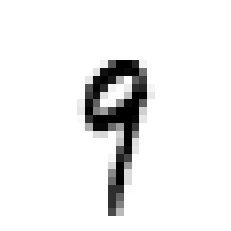

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[600]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = "nearest")
plt.axis("off")
plt.show()

### 위 이미지에 대한 target 값

In [23]:
y[600]

'9'

## train_test_split 대신 직접 갯수 분류

In [24]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [25]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### train set, test set이 원래는 0 ~ 9까지의 문자값이지만 
### 해당 함수로 False or True로 이진 분류로 만듦

In [26]:
y_train_9 = (y_train == '9')
y_test_9 = (y_test == '9')

# Modeling

In [27]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 10, random_state = 42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [28]:
sgd_clf.predict([some_digit])

array([ True])

## 교차 검증

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_9) :
    
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_9[train_index]
    
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_9[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

0.9401
0.95175
0.9485


In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv = 3, scoring = "accuracy")

array([0.9401 , 0.95175, 0.9485 ])

In [31]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(self, X, y = None) :
        pass
    def predict(self, X) :
        return np.zeros( (len(X), 1), dtype = bool )

In [32]:
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv = 3, scoring = "accuracy")

array([0.90195, 0.9007 , 0.8999 ])

## Confusion Matrix

In [33]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv = 3)

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_9, y_train_pred)

array([[52072,  1979],
       [ 1214,  4735]], dtype=int64)

# 정확히 일치

In [35]:
y_train_perfect_predictions = y_train_9

In [36]:
confusion_matrix(y_train_9, y_train_perfect_predictions)

array([[54051,     0],
       [    0,  5949]], dtype=int64)

# - Data가 불균형일 때 (불균형 중 몰린)많은 부분으로 다 예측한 경우

###  &nbsp;&nbsp; &#46; y_train_9에서 대부분 False이며 소수로 True

###   &nbsp;&nbsp; &#46; 전부 False로 선택

In [37]:
y_train_unbalance = np.array([False] * len(y_train_9))
y_train_unbalance

array([False, False, False, ..., False, False, False])

In [38]:
pd.Series(y_train_9).unique()

array([False,  True])

###   &nbsp;&nbsp; &#46; 전부 False로 예측했는데 accuracy가 약 90% 정도가 나옴

In [39]:
y_unbal_accuracy = sum(y_train_9 == y_train_unbalance) / len(y_train_9)
y_unbal_accuracy

0.90085

# 이를 보완하기 위해 Accuracy가 아닌 다른 것들

##  &nbsp;&nbsp; &#46; Precision(정밀도)과 Recall(재현율)

In [40]:
from sklearn.metrics import precision_score, recall_score
print("Precision : ", precision_score(y_train_9, y_train_pred), 
    "\nRecall : ", recall_score(y_train_9, y_train_pred))

Precision :  0.7052427762883527 
Recall :  0.7959320894267944


## &nbsp;&nbsp; &#46; F1 Score ( Precision과 Recall 를 보완)

In [41]:
from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred)

0.7478480612808971

### &#8251; 상황에 따라 Accuracy, Precision와 Recall(Trade-Off 관계) , F1 Scroe를 보는 등 해당 분야의 맞는 Score를 보아야함

# - Decision Function과 결정 임계값을 중점으로

&#8251; Decision Function : 샘플 공간(관측 공간)에서 결정 영역(Decision Region)으로 대응/사상/매핑시키는 함수

## &nbsp;&nbsp; &#46; some_digit가 9일 decision function

In [42]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([30634.47288043])

### &nbsp;&nbsp; &#46; 결정 임계값보다 decision function으로 나온 decision score과 비교하여 True False 결정

In [43]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

$ \frac{N(N-1)} {2}$

## 👊 다중 분류   

 𝐎 다중분류기에 종류   
$\quad$   - RandomForest, Naive Bayes 등의 Algorithm은 하나의 분류기를 사용하여 여러 개의 클래스를  처리 가능   
$\quad$   - SVM, 선형분류기 등(이진 분류기)의 Algorithm은 여러 개의 분류기를 사용하여 여러 개의 클래스를 처리 가능   
$\quad$        ※ RandomForest 같은 분류기를 통한 예측은 확률(predict_proba())로 선택   
$\quad$        ※ SGD(선형 분류기) 같은 분류기를 통한 예측은 결정 점수(decision_function())로 선택
           
 𝐎 OVA (One-Versus-All, One-Versus-the-rest, 일대다)    
$\quad$   - 분류해야할 개수를 N이라고 하면 각 분류대상을 분류하는 N개의 분류기를 만들어 훈련시킨 후 분류 대상이 왔을 때 각 분류기가  
$\quad$        decision_function()을 통해 결정 점수가 나오는데 그 중 가장 높은 것을 Class로 선택(ex ‘5’ or ‘5아님’ => ‘5’의 점수)  
$\quad$   - SVM같은 훈련 세트의 크기에 민감한 Algorithm들이 아닌 대부분의 이진 분류 Algorithm이 선호  
$\quad$   - 다중 클래스 분류 작업에 이진 분류 Algorithm을 선택하면 scikit learn이 자동으로 감지해 OvA, SVM분류기일 때는 OvO를 적용   
 𝐎 OVO (One-Versus-One, 일대일)   
$\quad$   - 분류해야할 개수를 N이라고 하면 각 분류대상을 분류하는 $ \frac{N(N-1)} {2} (==  _{N}C_{2} ) $개의 분류기를 만들어 훈련시킨 후   
$\quad$     분류 대상이 왔을 때 $_{N}C_{2}$개의 분류기 모두를 통과시켜서 가장 많이 양성으로 분류된 Class를 선택   
$\quad$     (ex 1 vs 2, 1 vs 3 ... => 가장 많이 나온 Class 선택)   
$\quad$      - 장점으로는 각 분류기의 훈련에 전체 훈련세트 중 구별할 두 클래스에 해당하는 샘플만 필요하다는 것    
$\quad$      - SVM 같은 훈련 세트의 크기에 민감한 Algorithm들은 큰 훈련 세트에서 몇 개의 분류기를 훈련시키는 것보다 작은 훈련세트에서      
$\quad$ 많은 분류기를 훈련시키는 쪽이 빠르므로 OVO를 선호   
$\quad$ ※ scikit learn에서 OvO나 OvA를 강제로 사용하도록 하려면 OneVsOneClassifier나 OneVsRestClassifier를 사용하면 됨    

 𝐎 Error 분석   
$\quad$   - 오차 행렬(confusion matrix)을 matshow()를 활용하여 이미지로 보는 것이 편리함   
$\quad$   - 절대 개수가 아니라 (해당 cell들의 값) / (실제값 총합)으로 하는 에러 비율로 비교하는 것이 좋음( 단, 이때 주대각선 값은 0으로 통일)   
$\quad$   - 모든 숫자를 한 번에 보는 것이 어려우니 유독 상호적으로 혼란이 오는 것이 있는 것들을 쌍으로 묶어 오차행렬처럼 이미지를 띄워서 보면 편함   
$\quad$   - SGD Classifier는 선형분류기이며 선형분류기는 Class마다 pixel에 가중치를 할당하고 새로운 이미지에 대해 단순히 pixel 강도의  
$\quad$   가중치 합을 Class의 점수로 계산을 함 (예를 들어 3과 5는 몇 개의 pixel만 다르기 때문에 model이 쉽게 혼동하여 잘못된 분류가 많음) 




 𝐎 다중label 분류   
$\quad$   - 분류기가 샘플마다 여러 개의 class를 출력해야 할 경우 (ex 사진에 있는 사람들 이름)   
$\quad$   - f1_score(y_test, y_pred, average = “binary”, “micro”, “macro” or “weighted” or “accuracy”)   
$\quad$	※ None : 각 class의 점수가 반환   
$\quad$	※ binary : class들이 y_test와 y_pred가 이진일 경우에만 적용가능    
$\quad$	※ micro : TP, FN, FP을 계산하여 전체적으로 metric을 계산   
$\quad$	※ macro : 단순평균   
$\quad$	※ weighted : 각 class는 표본의 개수로 가중평균   
$\quad$	※ samples : 각 instance의 지표를 계산하고 평균을 찾으십시오 ( accuracy_score 점수와 다른 다중 label 분류에만 의미가 있음)    
$\quad$	※ accuracy : 정확도, 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율   
$\quad$ 평가 방법 : F1 score 또는 이진 분류 지표의 평균   
 𝐎 다중 출력 분류   
$\quad$   - 다중 출력 다중 calss 분류(multioutput-multiclass classification)   
$\quad$   - image에 noise 제거 시 사용   

## 👊 Code

### 3.4 다중 분류

In [44]:
### 3.4 다중 분류
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [45]:
sgd_clf.fit(X_train, y_train)

sgd_clf.predict([some_digit])

array(['9'], dtype='<U1')

In [46]:
# 하나의 값에 대해 10번 분류 후 값이 가장 높은 것으로 분류
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-603613.22089217, -144378.16347871, -436387.42749474,
        -142516.25385394,  -91262.40658903,  -86424.49441947,
        -413237.1605379 , -287419.18673393,  -72479.08568542,
         252881.55561392]])

In [47]:
np.argmax(some_digit_scores)

9

In [48]:
# OvO vs OvA
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=5,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [49]:
ovo_clf.predict([some_digit])

array(['9'], dtype=object)

In [50]:
# OvO 으로 했을때 모델 개수
len(ovo_clf.estimators_)

45

In [51]:
# Randomforest
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(X_train, y_train)

forest_clf.predict([some_digit])

array(['9'], dtype=object)

In [52]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [53]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87217556, 0.87109355, 0.83892584])

In [54]:
# 정규화 후 분류
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91106779, 0.9080454 , 0.90888633])

### 3.5 에러 분석

In [55]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5741,    2,   22,   11,   11,   40,   48,    7,   39,    2],
       [   2, 6457,   49,   28,    6,   45,    9,   11,  125,   10],
       [  55,   35, 5323,   98,   79,   24,  104,   62,  162,   16],
       [  47,   40,  140, 5314,    3,  254,   34,   57,  141,  101],
       [  19,   25,   41,    9, 5360,   10,   56,   36,   77,  209],
       [  76,   39,   30,  174,   76, 4610,  110,   29,  168,  109],
       [  36,   20,   42,    2,   39,   89, 5632,    7,   50,    1],
       [  23,   19,   61,   26,   54,   11,    7, 5826,   14,  224],
       [  56,  149,   78,  143,   12,  163,   56,   27, 5012,  155],
       [  46,   30,   26,   83,  160,   35,    3,  207,   74, 5285]],
      dtype=int64)

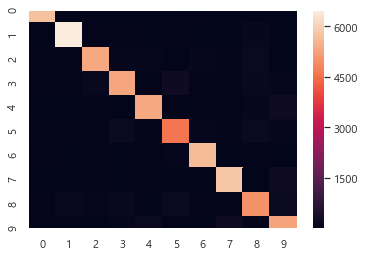

In [56]:
sn.heatmap(conf_mx);

In [57]:
# 주 대각선은 0으로, 비율 확인
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

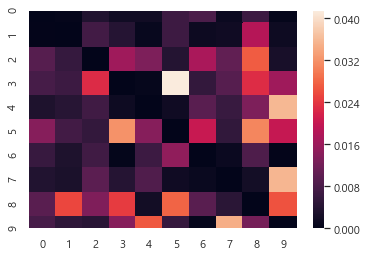

In [58]:
np.fill_diagonal(norm_conf_mx, 0)
sn.heatmap(norm_conf_mx);

In [59]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

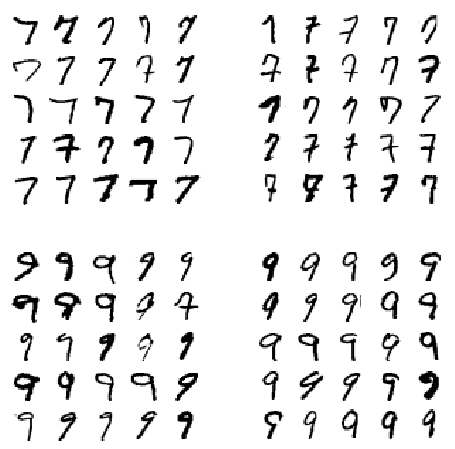

In [60]:
cl_a, cl_b = '7', '9'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### 3.6 다중 레이블 분류

In [61]:
from sklearn.neighbors import KNeighborsClassifier

y_train2 = np.array(list(map(lambda x : int(x), y_train)))

y_train_large = (y_train2 >= 7)
y_train_odd = (y_train2 % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
knn_clf.predict([some_digit])  # == 9

array([[ True,  True]])

In [63]:
%%time
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
print(f1_score(y_multilabel, y_train_knn_pred, average="macro"))

0.9768224011622285
Wall time: 30min 23s


### 3.7 다중 출력 분류

In [64]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [65]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

## noise 제거

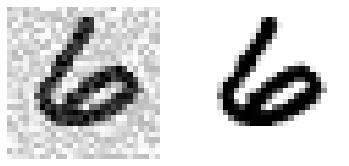

In [66]:
some_index = 5501
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

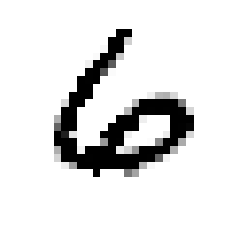

In [67]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)